In [ ]:
## Importing Basic Packages
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 50)

# Import NLP Packages
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
from bs4 import BeautifulSoup

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import  simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint
import matplotlib.colors as mcolors

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

#read the data
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
reviews_df = pd.read_excel('/content/filtered_clothing.xlsx')
reviews_df.rename(columns={'stars_x': 'Stars', 'stars_y': 'rating'}, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: '/content/filtered_clothing.xlsx'

In [ ]:
reviews_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,Stars,review_count,is_open,attributes,categories,hours,review_id,user_id,rating,useful,funny,cool,text,date
0,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.70046,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",nD9ug6O1rQQ_B6OuY5eitw,81CW8cGriSJM67-ZrijO-A,5,1,0,0,The people at the store amazing! We came in to...,2017-02-20 01:15:06
1,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.70046,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",ok15zpwBjImmf3KlSGUkJw,qPRY6ZGFDgWM-T7ByAlMJg,4,0,0,1,This is the best priced place for tank tops th...,2016-09-06 15:05:38
2,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.70046,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",Q3LfxYXMB_odT6HJRQdqkQ,b0ElohIhUZjNHrwvTtBtwA,4,1,0,1,Glad to have H&M in Santa Barbara. What an exc...,2011-08-25 09:42:43
3,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.70046,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",k0xQrwbjdb9DqoWSPmcG1g,HtPSa9IIR4q9bSSAcrbyIw,1,1,0,1,The staff of this H&M are some of the WORST re...,2015-09-12 23:46:16
4,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.70046,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",F4GX4w0lA0NwoOzd84kZZg,sP8-a_xDC8oo7EMQTRqJ3g,2,1,0,0,There could be no slower service in the histor...,2014-11-18 02:43:51


In [ ]:
reviews_df.shape

(2021, 22)

#SENTIMENT ANALYSIS :

In [ ]:
from openpyxl import load_workbook
import pandas as pd

# Load the Excel file
wb = load_workbook('/content/filtered_clothing.xlsx')
sheet = wb.active

# Convert to DataFrame
df = pd.DataFrame(sheet.values)

# If the first row is the header, set it as the DataFrame header
df.columns = df.iloc[0]
df = df[1:]

# Save to CSV
csv_file_path = '/content/filtered_clothing.csv'
df.to_csv(csv_file_path, index=False)

In [ ]:
from textblob import TextBlob
import re
import pandas as pd

# Load your dataset in chunks
chunk_size = 5000  # Adjust based on your machine's memory
chunks = pd.read_csv('/content/filtered_clothing.csv',chunksize=chunk_size)

def preprocess_text(text):
    # Your text preprocessing steps here
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

def analyze_sentiment(text):
    blob = TextBlob(text)
    return 'Positive' if blob.sentiment.polarity > 0 else 'Neutral' if blob.sentiment.polarity == 0 else 'Negative'

results = []
for chunk in chunks:
    chunk = chunk.copy()  # Work on a copy to avoid SettingWithCopyWarning
    chunk['preprocessed_text'] = chunk['text'].apply(preprocess_text)
    chunk['sentiment'] = chunk['preprocessed_text'].apply(analyze_sentiment)
    results.append(chunk)

# Combine all processed chunks
final_df = pd.concat(results, ignore_index=True)

# Save the processed DataFrame to a new CSV file
final_df.to_csv('processed_sentiment_analysis.csv', index=False)

In [ ]:
# Load the processed dataset
processed_data = pd.read_csv('processed_sentiment_analysis.csv')

# Filter for clothing businesses in California if not already filtered
#clothing_data = processed_data[(processed_data['state'].isin(['CA'])) & processed_data['categories'].str.contains('Clothing', case=False, na=False)]

# Analyze sentiment distribution
sentiment_distribution = processed_data['sentiment'].value_counts(normalize=True) * 100
print(sentiment_distribution)

sentiment
Positive    86.392875
Negative    12.864918
Neutral      0.742207
Name: proportion, dtype: float64


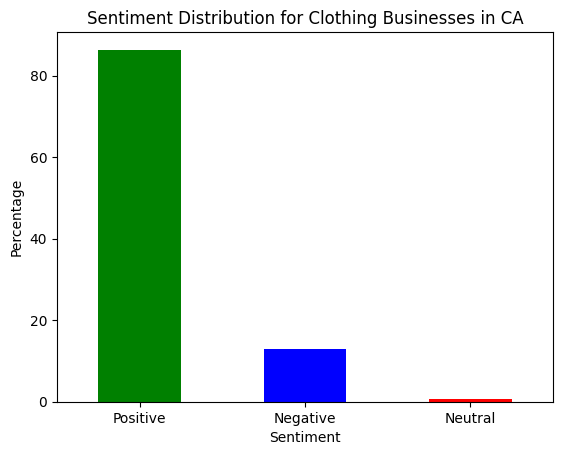

In [ ]:
import matplotlib.pyplot as plt

# Visualize sentiment distribution
sentiment_distribution.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution for Clothing Businesses in CA')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

#FURTHER PRE-PROCESSING :

In [ ]:
# Converting words in reviews to a list

def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True)
        yield(sent)

# Convert to list

data = reviews_df.text.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['the', 'people', 'at', 'the', 'store', 'amazing', 'we', 'came', 'in', 'to', 'exchange', 'shirt', 'from', 'few', 'days', 'before', 'they', 'had', 'had', 'some', 'damage', 'and', 'the', 'managers', 'were', 'so', 'helpful', 'with', 'our', 'situation', 'tonya', 'is', 'the', 'best', 'without', 'hesitation', 'she', 'is', 'going', 'to', 'help', 'us', 'out']]


In [ ]:
# Text Processing

import spacy

def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])

    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]
    return texts_out

data_ready = process_words(data_words)

In [ ]:
# Create Dictionary

id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency

corpus = [id2word.doc2bow(text) for text in data_ready]

In [ ]:
# Build LDA model

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           random_state=42,
                                           chunksize=250,
                                           passes=5,
                                           alpha='auto',
                                           iterations=10,
                                           per_word_topics=False)

In [ ]:
# Overview of Dominant Topics

print(lda_model.print_topics())

[(0, '0.020*"place" + 0.019*"reasonable" + 0.015*"vibe" + 0.015*"town" + 0.014*"cat" + 0.014*"ornament" + 0.012*"trinket" + 0.009*"pop" + 0.009*"bottom" + 0.009*"really"'), (1, '0.036*"great" + 0.019*"find" + 0.019*"place" + 0.018*"helpful" + 0.015*"friendly" + 0.015*"always" + 0.015*"store" + 0.014*"love" + 0.014*"staff" + 0.013*"shop"'), (2, '0.030*"gift" + 0.022*"shop" + 0.020*"little" + 0.020*"clothing" + 0.018*"brand" + 0.017*"price" + 0.016*"jewelry" + 0.015*"item" + 0.014*"clothe" + 0.014*"selection"'), (3, '0.016*"white" + 0.015*"mask" + 0.013*"pant" + 0.013*"ago" + 0.010*"enough" + 0.010*"purchase" + 0.009*"store" + 0.009*"baby" + 0.009*"enter" + 0.009*"dress"'), (4, '0.033*"store" + 0.019*"look" + 0.017*"customer" + 0.017*"buy" + 0.012*"item" + 0.012*"service" + 0.011*"time" + 0.011*"ask" + 0.009*"walk" + 0.008*"find"')]


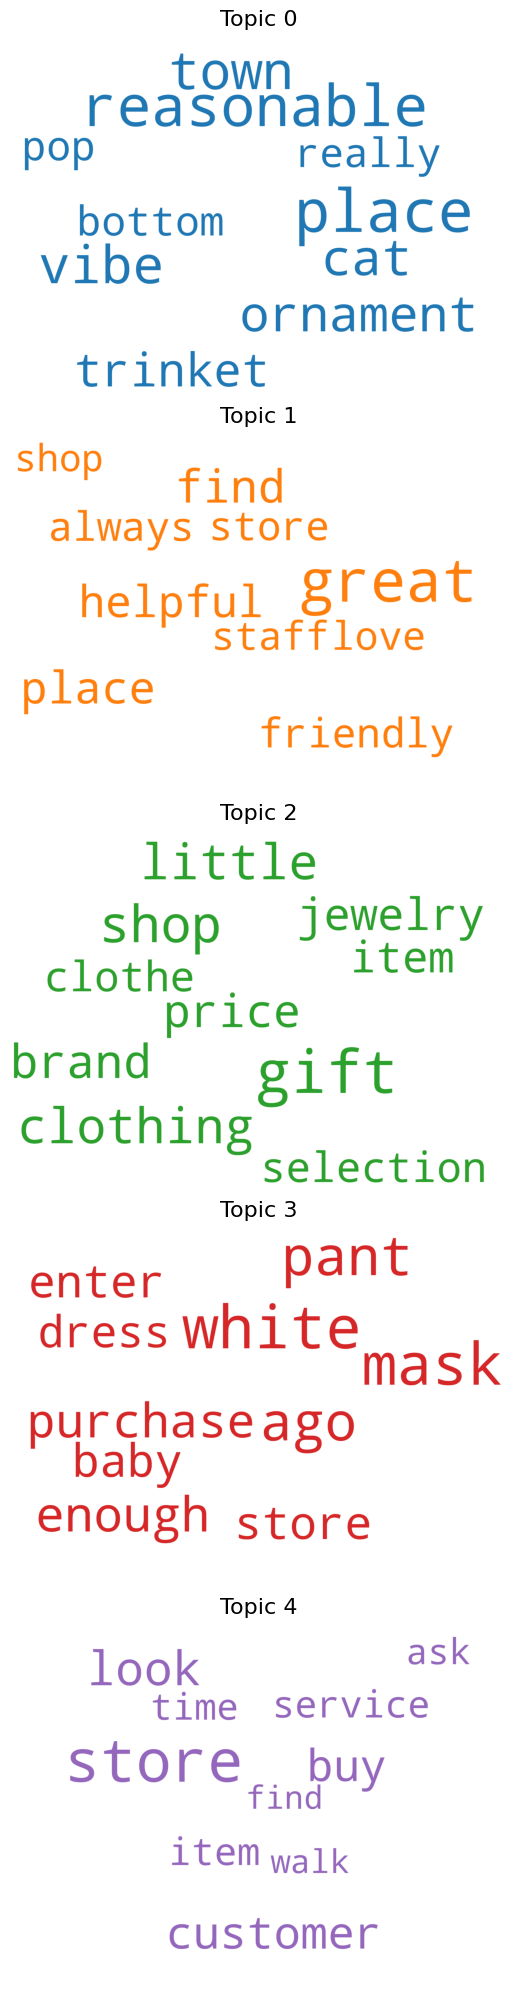

In [ ]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 1, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

def format_topics_sentences(ldamodel=None, corpus=None, texts=None):
    # Initialize output
    sent_topics_data = []  # Use a list to collect data

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution, and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_data.append([int(topic_num), round(prop_topic,4), topic_keywords])
                break

    # Create a DataFrame
    sent_topics_df = pd.DataFrame(sent_topics_data, columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents.rename("Text")], axis=1)
    return sent_topics_df

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

In [ ]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic','Perc_Contribution','Keywords', 'Text']
print(df_dominant_topic.shape)
df_dominant_topic.head(10)

(2021, 5)


,Document_No,Dominant_Topic,Perc_Contribution,Keywords,Text
0,0,4,0.6689,"store, look, customer, buy, item, service, tim...","[people, store, amazing, exchange, shirt, day,..."
1,1,4,0.4309,"store, look, customer, buy, item, service, tim...","[well, price, place, tank, top, find, forever,..."
2,2,1,0.4694,"great, find, place, helpful, friendly, always,...","[glad, fit, clean, visually, appeal, store, va..."
3,3,4,0.9072,"store, look, customer, buy, item, service, tim...","[staff, bad, retail, employee, ever, encounter..."
4,4,4,0.8401,"store, look, customer, buy, item, service, tim...","[slow, service, history, retail, bad, selectio..."
5,5,4,0.4836,"store, look, customer, buy, item, service, tim...","[compare, oxnard, riverpark, location, locatio..."
6,6,1,0.7328,"great, find, place, helpful, friendly, always,...","[help, gal, name, incredibly, helpful, knowled..."
7,7,4,0.5488,"store, look, customer, buy, item, service, tim...","[complaint, love, basic, well, stylish, clothi..."
8,8,4,0.6866,"store, look, customer, buy, item, service, tim...","[great, price, super, mean, management, staff,..."
9,9,4,0.4326,"store, look, customer, buy, item, service, tim...","[usually, review, clothing, store, recent, exp..."


In [ ]:
# Append new columns onto reviews dataset

df_dominant_topic['Text_Chunks'] = df_dominant_topic['Text']
extra_feature_columns = df_dominant_topic[['Dominant_Topic', 'Keywords', 'Text_Chunks']]
final_reviews = pd.concat([reviews_df,extra_feature_columns], axis=1).reindex(reviews_df.index)
final_reviews.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,Stars,review_count,is_open,attributes,categories,hours,review_id,user_id,rating,useful,funny,cool,text,date,Dominant_Topic,Keywords,Text_Chunks
0,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.70046,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",nD9ug6O1rQQ_B6OuY5eitw,81CW8cGriSJM67-ZrijO-A,5,1,0,0,The people at the store amazing! We came in to...,2017-02-20 01:15:06,4,"store, look, customer, buy, item, service, tim...","[people, store, amazing, exchange, shirt, day,..."
1,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.70046,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",ok15zpwBjImmf3KlSGUkJw,qPRY6ZGFDgWM-T7ByAlMJg,4,0,0,1,This is the best priced place for tank tops th...,2016-09-06 15:05:38,4,"store, look, customer, buy, item, service, tim...","[well, price, place, tank, top, find, forever,..."
2,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.70046,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",Q3LfxYXMB_odT6HJRQdqkQ,b0ElohIhUZjNHrwvTtBtwA,4,1,0,1,Glad to have H&M in Santa Barbara. What an exc...,2011-08-25 09:42:43,1,"great, find, place, helpful, friendly, always,...","[glad, fit, clean, visually, appeal, store, va..."
3,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.70046,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",k0xQrwbjdb9DqoWSPmcG1g,HtPSa9IIR4q9bSSAcrbyIw,1,1,0,1,The staff of this H&M are some of the WORST re...,2015-09-12 23:46:16,4,"store, look, customer, buy, item, service, tim...","[staff, bad, retail, employee, ever, encounter..."
4,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.70046,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",F4GX4w0lA0NwoOzd84kZZg,sP8-a_xDC8oo7EMQTRqJ3g,2,1,0,0,There could be no slower service in the histor...,2014-11-18 02:43:51,4,"store, look, customer, buy, item, service, tim...","[slow, service, history, retail, bad, selectio..."


In [ ]:
ca_data1 = final_reviews.copy()

In [ ]:
!pip install --upgrade pandas


##Content Based Recommendation System

In [ ]:
final_reviews['super_score']=final_reviews['Stars']
ca_data = final_reviews[['business_id', 'user_id','name', 'categories','super_score', 'Keywords']]
ca_data.head(3)

,business_id,user_id,name,categories,super_score,Keywords
0,noByYNtDLQAra9ccqxdfDw,81CW8cGriSJM67-ZrijO-A,H&M,"Women's Clothing, Accessories, Children's Clot...",3.0,"store, look, customer, buy, item, service, tim..."
1,noByYNtDLQAra9ccqxdfDw,qPRY6ZGFDgWM-T7ByAlMJg,H&M,"Women's Clothing, Accessories, Children's Clot...",3.0,"store, look, customer, buy, item, service, tim..."
2,noByYNtDLQAra9ccqxdfDw,b0ElohIhUZjNHrwvTtBtwA,H&M,"Women's Clothing, Accessories, Children's Clot...",3.0,"great, find, place, helpful, friendly, always,..."


In [ ]:
# Combining the text in Keywords and categories columns

ca_data['All_Keywords'] = ca_data['categories'].str.cat(ca_data['Keywords'],sep=", ")
ca_data.head()

<ipython-input-18-079850d8233d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_data['All_Keywords'] = ca_data['categories'].str.cat(ca_data['Keywords'],sep=", ")


,business_id,user_id,name,categories,super_score,Keywords,All_Keywords
0,noByYNtDLQAra9ccqxdfDw,81CW8cGriSJM67-ZrijO-A,H&M,"Women's Clothing, Accessories, Children's Clot...",3.0,"store, look, customer, buy, item, service, tim...","Women's Clothing, Accessories, Children's Clot..."
1,noByYNtDLQAra9ccqxdfDw,qPRY6ZGFDgWM-T7ByAlMJg,H&M,"Women's Clothing, Accessories, Children's Clot...",3.0,"store, look, customer, buy, item, service, tim...","Women's Clothing, Accessories, Children's Clot..."
2,noByYNtDLQAra9ccqxdfDw,b0ElohIhUZjNHrwvTtBtwA,H&M,"Women's Clothing, Accessories, Children's Clot...",3.0,"great, find, place, helpful, friendly, always,...","Women's Clothing, Accessories, Children's Clot..."
3,noByYNtDLQAra9ccqxdfDw,HtPSa9IIR4q9bSSAcrbyIw,H&M,"Women's Clothing, Accessories, Children's Clot...",3.0,"store, look, customer, buy, item, service, tim...","Women's Clothing, Accessories, Children's Clot..."
4,noByYNtDLQAra9ccqxdfDw,sP8-a_xDC8oo7EMQTRqJ3g,H&M,"Women's Clothing, Accessories, Children's Clot...",3.0,"store, look, customer, buy, item, service, tim...","Women's Clothing, Accessories, Children's Clot..."


<ipython-input-19-a7d0231ff962>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ca_data, x='super_score', y='Keywords', inner='box', palette='Dark2')


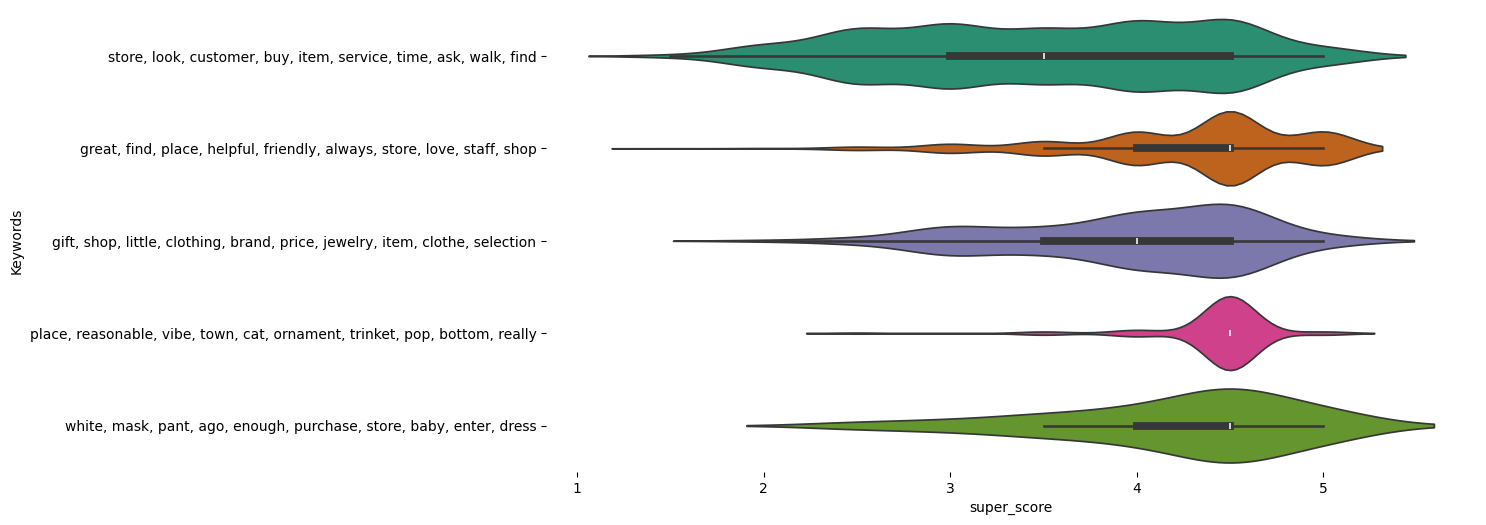

In [ ]:
# @title Keywords vs super_score

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(ca_data['Keywords'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(ca_data, x='super_score', y='Keywords', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
ca_data.All_Keywords.head(1)

0    Women's Clothing, Accessories, Children's Clot...
Name: All_Keywords, dtype: object

In [ ]:
# Formating the All_Keywords Column

ca_data['All_Keywords'] = ca_data['All_Keywords'].map(lambda x: str(x))
ca_data['All_Keywords'] = ca_data['All_Keywords'].map(lambda x: x.lower())
print(ca_data.shape)
ca_data.head()

(2021, 7)


<ipython-input-21-6fb40c1a12cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_data['All_Keywords'] = ca_data['All_Keywords'].map(lambda x: str(x))
<ipython-input-21-6fb40c1a12cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_data['All_Keywords'] = ca_data['All_Keywords'].map(lambda x: x.lower())


,business_id,user_id,name,categories,super_score,Keywords,All_Keywords
0,noByYNtDLQAra9ccqxdfDw,81CW8cGriSJM67-ZrijO-A,H&M,"Women's Clothing, Accessories, Children's Clot...",3.0,"store, look, customer, buy, item, service, tim...","women's clothing, accessories, children's clot..."
1,noByYNtDLQAra9ccqxdfDw,qPRY6ZGFDgWM-T7ByAlMJg,H&M,"Women's Clothing, Accessories, Children's Clot...",3.0,"store, look, customer, buy, item, service, tim...","women's clothing, accessories, children's clot..."
2,noByYNtDLQAra9ccqxdfDw,b0ElohIhUZjNHrwvTtBtwA,H&M,"Women's Clothing, Accessories, Children's Clot...",3.0,"great, find, place, helpful, friendly, always,...","women's clothing, accessories, children's clot..."
3,noByYNtDLQAra9ccqxdfDw,HtPSa9IIR4q9bSSAcrbyIw,H&M,"Women's Clothing, Accessories, Children's Clot...",3.0,"store, look, customer, buy, item, service, tim...","women's clothing, accessories, children's clot..."
4,noByYNtDLQAra9ccqxdfDw,sP8-a_xDC8oo7EMQTRqJ3g,H&M,"Women's Clothing, Accessories, Children's Clot...",3.0,"store, look, customer, buy, item, service, tim...","women's clothing, accessories, children's clot..."


In [ ]:
# Adding and Grouping Rows together by Restaurant Name

ca_final = ca_data.groupby('name')['All_Keywords'].sum()
ca_final = ca_final.to_frame(name = 'sum').reset_index()
ca_final

,name,sum
0,ANGL,"women's clothing, fashion, shopping, accessori..."
1,Ace Rivington,"shopping, shoe stores, men's clothing, fashion..."
2,Angel,"fashion, jewelry, shopping, accessories, women..."
3,Anthropologie,"home & garden, home decor, women's clothing, f..."
4,Antoinette,"accessories, lingerie, fashion, shopping, wome..."
...,...,...
80,Wendy Foster State Street,"shopping, fashion, women's clothing, accessori..."
81,Whiskey & Leather,"shopping, accessories, men's clothing, fashion..."
82,Whistle Club,"accessories, shopping, women's clothing, shoe ..."
83,Wolf's Head,"barbers, shopping, accessories, fashion, beaut..."


In [ ]:
# Getting a list of Unique Keywords per Restaurant

ca_final['sum'] = ca_final['sum'].map(lambda x: x.replace(", ","', '"))
ca_final['sum'] = ca_final['sum'].map(lambda x: str("'") + x + str("'"))
f = lambda x: x["sum"].split(", ")
ca_final['sum'] = ca_final.apply(f, axis=1)
ca_final['sum'] = ca_final['sum'].map(lambda x: set(x))
ca_final.set_index('name', inplace = True)
ca_final.head()

,sum
name,
ANGL,"{'love', 'selectionwomen's clothing', 'buy', '..."
Ace Rivington,"{'shoe stores', 'love', 'mask', 'buy', 'ago', ..."
Angel,"{'shopfashion', 'love', 'buy', 'jewelry', 'tim..."
Anthropologie,"{'home decor', 'love', 'mask', 'dresshome & ga..."
Antoinette,"{'shopaccessories', 'love', 'mask', 'findacces..."


In [ ]:
# Assuming tucson_final is your DataFrame
ca_final['bag_of_words'] = ''

# Loop over each row
for index, row in ca_final.iterrows():
    words = ''
    for col in ca_final.columns:
        # Convert everything to string and concatenate
        words += str(row[col]) + ' '
    # Update the 'bag_of_words' directly in the DataFrame
    ca_final.at[index, 'bag_of_words'] = words.strip()

# Drop all other columns except 'bag_of_words'
tucson_final = ca_final[['bag_of_words']]

# Display the head of the modified DataFrame
tucson_final.head()

,bag_of_words
name,
ANGL,"{""'love'"", ""'selectionwomen's clothing'"", ""'bu..."
Ace Rivington,"{""'shoe stores'"", ""'love'"", ""'mask'"", ""'buy'"",..."
Angel,"{""'shopfashion'"", ""'love'"", ""'buy'"", ""'jewelry..."
Anthropologie,"{""'home decor'"", ""'love'"", ""'mask'"", ""'dressho..."
Antoinette,"{""'shopaccessories'"", ""'love'"", ""'mask'"", ""'fi..."


In [ ]:
# Remove quotation marks

ca_final['bag_of_words'] = ca_final['bag_of_words'].map(lambda x: x.replace("'", ""))
ca_final['bag_of_words'] = ca_final['bag_of_words'].map(lambda x: x.replace('"', ''))
ca_final.head()

,sum,bag_of_words
name,,
ANGL,"{'love', 'selectionwomen's clothing', 'buy', '...","{love, selectionwomens clothing, buy, jewelry,..."
Ace Rivington,"{'shoe stores', 'love', 'mask', 'buy', 'ago', ...","{shoe stores, love, mask, buy, ago, time, look..."
Angel,"{'shopfashion', 'love', 'buy', 'jewelry', 'tim...","{shopfashion, love, buy, jewelry, time, staff,..."
Anthropologie,"{'home decor', 'love', 'mask', 'dresshome & ga...","{home decor, love, mask, dresshome & garden, b..."
Antoinette,"{'shopaccessories', 'love', 'mask', 'findacces...","{shopaccessories, love, mask, findaccessories,..."


In [ ]:
# instantiating and generating the count matrix
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
count_matrix = count.fit_transform(ca_final['bag_of_words'])

# creating a Series for the restaurant names so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(ca_final.index)
indices[:5]

0             ANGL
1    Ace Rivington
2            Angel
3    Anthropologie
4       Antoinette
Name: name, dtype: object

In [ ]:
count_matrix.shape

(85, 235)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.57118721, 0.85833251, ..., 0.48862727, 0.55679425,
        0.58678437],
       [0.57118721, 1.        , 0.63913552, ..., 0.5062176 , 0.82199494,
        0.58531711],
       [0.85833251, 0.63913552, 1.        , ..., 0.52048004, 0.61977979,
        0.62186841],
       ...,
       [0.48862727, 0.5062176 , 0.52048004, ..., 1.        , 0.41697519,
        0.34259435],
       [0.55679425, 0.82199494, 0.61977979, ..., 0.41697519, 1.        ,
        0.57361113],
       [0.58678437, 0.58531711, 0.62186841, ..., 0.34259435, 0.57361113,
        1.        ]])

In [ ]:
# function that takes in movie title as input and returns the top 10 recommended movies
def content_based_recommendations(name, cosine_sim = cosine_sim):

    recommended_restaurants = []

    # gettin the index of the movie that matches the title
    idx = indices[indices == name].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)

    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_restaurants.append(list(ca_final.index)[i])

    return recommended_restaurants

**Examples:**

In [ ]:
content_based_recommendations('ANGL')

['H&M',
 'Crossroads Trading Co.',
 'Dear Diary',
 'Polar Bear',
 'Natasha',
 'Rincon Design',
 'Tillys',
 'Whiskey & Leather',
 'Jessica',
 'Inspire']

In [ ]:
restaurant = ca_data[ca_data['name'] == 'ANGL'][['name','categories', 'All_Keywords']]
restaurant.head(1)

,name,categories,All_Keywords
1423,ANGL,"Women's Clothing, Fashion, Shopping, Accessories","women's clothing, fashion, shopping, accessori..."


In [ ]:
restaurant1 = ca_data[ca_data['name'] == 'Ace Rivington'][['name','categories', 'All_Keywords']]
restaurant1.head(1)

,name,categories,All_Keywords
325,Ace Rivington,"Shopping, Shoe Stores, Men's Clothing, Fashion...","shopping, shoe stores, men's clothing, fashion..."


In [ ]:
restaurant2 = ca_data[ca_data['name'] == 'Angel'][['name','categories', 'All_Keywords']]
restaurant2.head(1)

,name,categories,All_Keywords
586,Angel,"Fashion, Jewelry, Shopping, Accessories, Women...","fashion, jewelry, shopping, accessories, women..."


In [ ]:
restaurant3 = ca_data[ca_data['name'] == 'laco'][['name','categories', 'All_Keywords']]
restaurant3.head(1)

,name,categories,All_Keywords
86283,laco,"american (new), american (traditional), bars, ...","american (new), american (traditional), bars, ..."


In [ ]:
content_based_recommendations('zona 78')

['rollies mexican patio',
 "ole' mexican grill",
 'ja ramen curry',
 'charrovida',
 "bazil's",
 "caruso's",
 'two girls pizzeria',
 'bacio italiano',
 "mama's famous pizza & heros",
 'falora']

In [ ]:
restaurant = ca_data[ca_data['name'] == 'zona 78'][['name','categories', 'All_Keywords']]
restaurant.head(1)

,name,categories,All_Keywords
78638,zona 78,"desserts, food, italian, pizza, restaurants","desserts, food, italian, pizza, restaurants, o..."


In [ ]:
restaurant1 = ca_data[ca_data['name'] == 'rollies mexican patio'][['name','categories', 'All_Keywords']]
restaurant1.head(1)

,name,categories,All_Keywords
160799,rollies mexican patio,"desserts, food, mexican, restaurants","desserts, food, mexican, restaurants, order, p..."


In [ ]:
restaurant1 = ca_data[ca_data['name'] == 'ja ramen curry'][['name','categories', 'All_Keywords']]
restaurant1.head(1)

,name,categories,All_Keywords
38993,ja ramen curry,"desserts, food, japanese, japanese curry, rame...","desserts, food, japanese, japanese curry, rame..."
